corrProtoss: 0.7225646505466412
corrZerg: 0.5648143644698528
corrTerran: 0.8157940074975938
corr worker and win: 0.002690172963543424
corr army and win: -0.03877291533308946


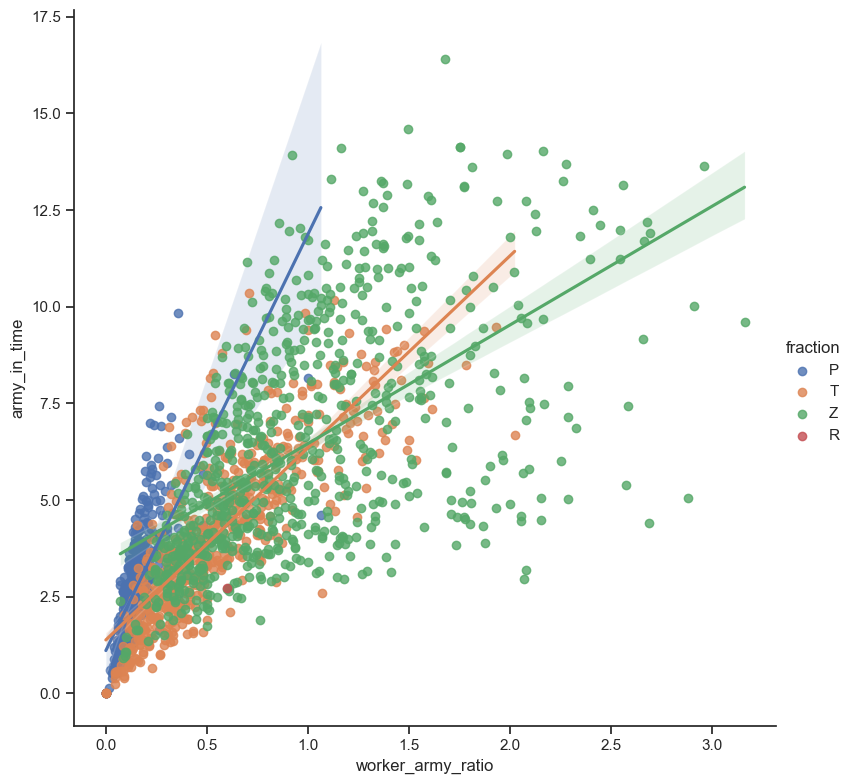

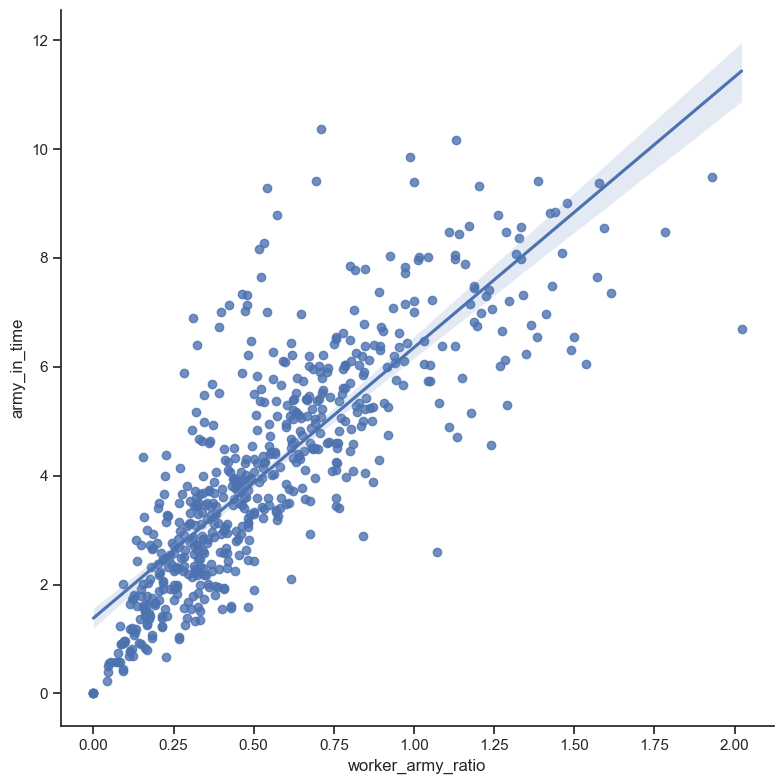

In [118]:
# Ermitteln welche Fraktion die stärkste Korrelation hat

import pandas as pd
import warnings

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np


df1 = pd.read_csv('csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('csv_dateien/starcraftFinalcsvs/2ndRun.csv')
df3 = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

df = pd.concat([df1, df2, df3, df4])

findoutx = "worker_army_ratio"
findouty = "army_in_time"

df = df[df["time"] > 0]

df["army_in_time"] = df["total_army_value"]/df["time"]
df["worker_army_ratio"] = df["total_army"]/df["total_workers"]

heighti = 8

g3= sns.lmplot(x=findoutx, y=findouty, hue="fraction", data=df[[findoutx,findouty,"fraction"]],
          height=heighti)


dfProtoss = df[df["fraction"] == "P"]
dfZerg = df[df["fraction"] == "Z"]
dfTerran = df[df["fraction"] == "T"]

corrProtoss = dfProtoss[findoutx].corr(dfProtoss[findouty])
corrZerg = dfZerg[findoutx].corr(dfZerg[findouty])
corrTerran = dfTerran[findoutx].corr(dfTerran[findouty])

print("corrProtoss: {}\ncorrZerg: {}\ncorrTerran: {}".format(corrProtoss,corrZerg,corrTerran))

g3= sns.lmplot(x=findoutx, y=findouty, data=dfTerran[[findoutx,findouty]],
          height=heighti)

# Korrelation worker und sieg

corrWorker = dfTerran["total_workers"].corr(dfTerran["winner"])

# Korrelation army und sieg
# keine Korrelation, da nur die army zum ersten zeitpunkt zählt

corrArmy = dfTerran["total_army"].corr(dfTerran["winner"])

print("corr worker and win: {}\ncorr army and win: {}".format(corrWorker,corrArmy))


In [ ]:
# Ermitteln welche Fraktion die stärkste Korrelation hat

import pandas as pd
import warnings

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np


df1 = pd.read_csv('csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('csv_dateien/starcraftFinalcsvs/2ndRun.csv')
df3 = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

df = pd.concat([df1, df2, df3, df4])

heighti = 8

g3= sns.lmplot(x="total_workers", y="total_army", hue="fraction", data=df[["total_workers", "total_army", "fraction"]],
          height=heighti)


dfProtoss = df[df["fraction"] == "P"]
dfZerg = df[df["fraction"] == "Z"]
dfTerran = df[df["fraction"] == "T"]

corrProtoss = dfProtoss["total_workers"].corr(dfProtoss["total_army"])
corrZerg = dfZerg["total_workers"].corr(dfZerg["total_army"])
corrTerran = dfTerran["total_workers"].corr(dfTerran["total_army"])

print("corrProtoss: {}\ncorrZerg: {}\ncorrTerran: {}".format(corrProtoss,corrZerg,corrTerran))

g3= sns.lmplot(x="total_workers", y="total_army", hue="winner", data=dfTerran[["total_workers", "total_army", "winner"]],
          height=heighti)

# Korrelation worker und sieg

corrWorker = dfTerran["total_workers"].corr(dfTerran["winner"])

# Korrelation army und sieg
# keine Korrelation, da nur die army zum ersten zeitpunkt zählt

corrArmy = dfTerran["total_army"].corr(dfTerran["winner"])

print("corr worker and win: {}\ncorr army and win: {}".format(corrWorker,corrArmy))


In [58]:
# Ermitteln welche Fraktion die stärkste Korrelation hat

import pandas as pd
import warnings

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np


df1 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/2ndRun.csv')
df3 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/4thRun.csv')

df = pd.concat([df1, df2, df3, df4])

heighti = 8

g3= sns.lmplot(x="total_workers", y="total_army_value", hue="fraction", data=df[["total_workers", "total_army", "fraction", "total_army_value"]],
          height=heighti)


dfProtoss = df[df["fraction"] == "P"]
dfZerg = df[df["fraction"] == "Z"]
dfTerran = df[df["fraction"] == "T"]

corrProtoss = dfProtoss["total_workers"].corr(dfProtoss["total_army_value"])
corrZerg = dfZerg["total_workers"].corr(dfZerg["total_army_value"])
corrTerran = dfTerran["total_workers"].corr(dfTerran["total_army_value"])

print("corrProtoss: {}\ncorrZerg: {}\ncorrTerran: {}".format(corrProtoss,corrZerg,corrTerran))

g3= sns.lmplot(x="total_workers", y="total_army_value", hue="winner", data=dfTerran[["total_workers", "total_army_value", "winner"]],
          height=heighti)

# Korrelation worker und sieg

corrWorker = dfTerran["total_workers"].corr(dfTerran["winner"])

# Korrelation army und sieg
# keine Korrelation, da nur die army zum ersten zeitpunkt zählt

corrArmy = dfTerran["total_army_value"].corr(dfTerran["winner"])

print("corr worker and win: {}\ncorr army and win: {}".format(corrWorker,corrArmy))


FileNotFoundError: [Errno 2] No such file or directory: '../csv_dateien/starcraftFinalcsvs/1stRun.csv'

------------------------------------------------------->-0.18791905152934926
-------------------
Protoss: -0.28168935937527223
Zerg: -0.12252817922846267
Terran: -0.3601842871567207
corr worker and win: -0.011004802279952585
corr army and win: -0.04648469884950557


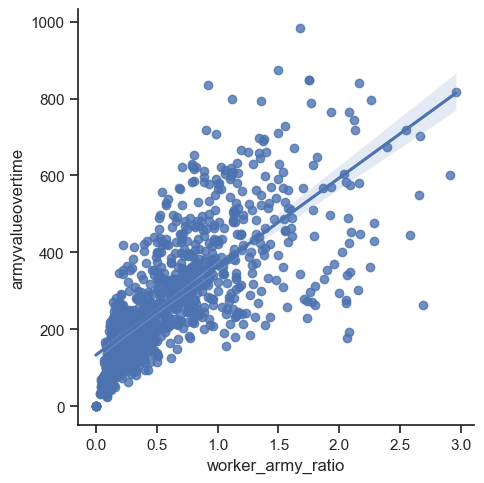

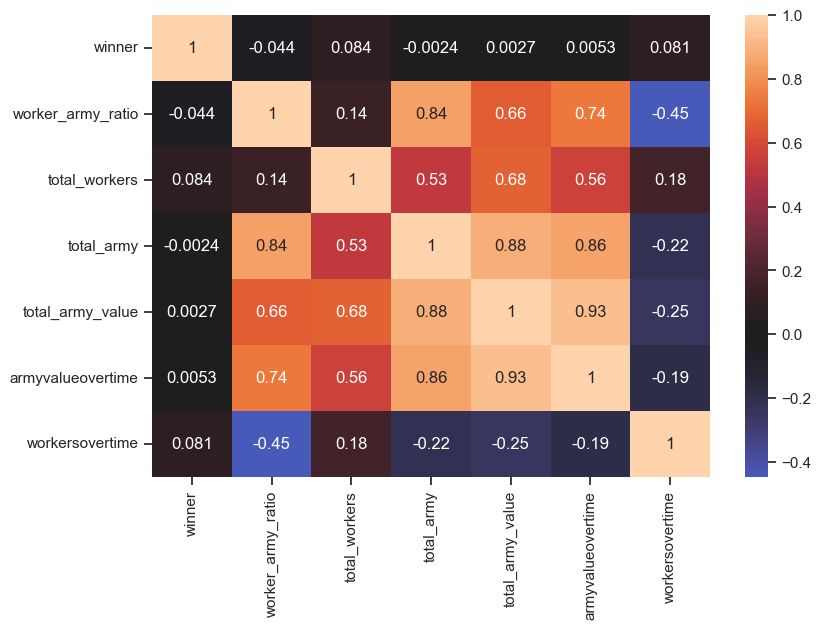

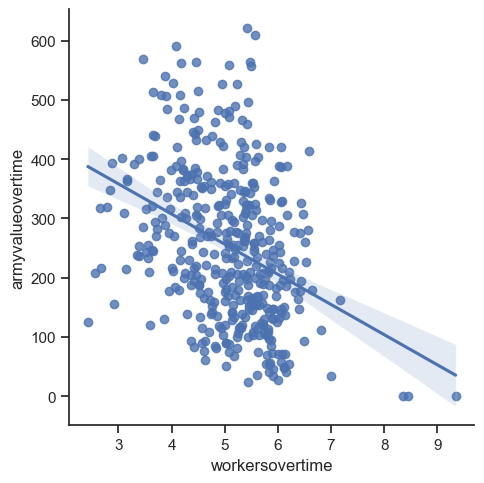

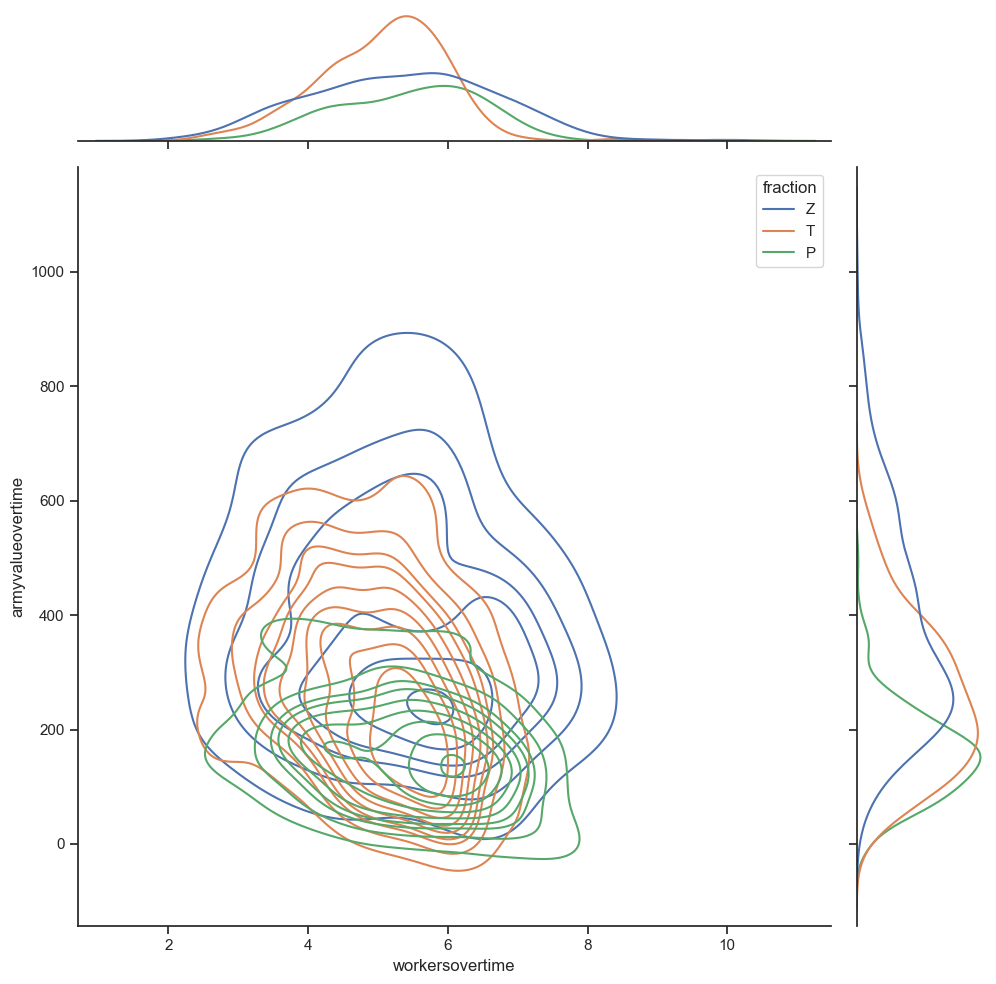

In [104]:
# Ermitteln welche Fraktion die stärkste Korrelation hat

import pandas as pd
import warnings

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

"""
df1 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/2ndRun.csv')
"""
df3 = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

df = pd.concat([df3, df4])
"""
conditions = [
    (df['timestamp'] <= 420),
    (df['timestamp'] > 420) & (df['timestamp'] <= 1200),
    (df['timestamp'] > 1200),
]

values = ['earlygame', 'midgame', 'lategame']

df["gamestate"] = np.select(conditions, values)


print(df.head())
"""
df["armyvalueovertime"] = df["total_army_value"]/(df["time"]/60)
df["workersovertime"] = df["total_workers"]/(df["time"]/60)

df["worker_army_ratio"] = df["total_army"]/df["total_workers"]

df = df[df["workersovertime"] < 15]
df = df[df["fraction"] != "R"]

heighti = 5


g3= sns.lmplot(x="worker_army_ratio", y="armyvalueovertime", data=df[["winner", "worker_army_ratio","total_workers", "total_army", "fraction", "total_army_value","winner", "armyvalueovertime", "workersovertime" ]],
          height=heighti)


f, ax = plt.subplots(figsize=(9, 6))

sns.heatmap(df[["winner", "worker_army_ratio","total_workers", "total_army", "total_army_value","armyvalueovertime", "workersovertime"]].corr(), annot=True, center=0)

corrProtoss = df["workersovertime"].corr(df["armyvalueovertime"])
print("------------------------------------------------------->"+ str(corrProtoss))

dfProtoss = df[df["fraction"] == "P"]
dfZerg = df[df["fraction"] == "Z"]
dfTerran = df[df["fraction"] == "T"]


g3= sns.lmplot(x="workersovertime", y="armyvalueovertime", data=dfTerran[["winner", "worker_army_ratio","total_workers", "total_army", "fraction", "total_army_value","winner", "armyvalueovertime", "workersovertime" ]],
          height=heighti)

corrProtoss = dfProtoss["workersovertime"].corr(dfProtoss["armyvalueovertime"])
corrZerg = dfZerg["workersovertime"].corr(dfZerg["armyvalueovertime"])
corrTerran = dfTerran["workersovertime"].corr(dfTerran["armyvalueovertime"])

print("-------------------\nProtoss: {}\nZerg: {}\nTerran: {}".format(corrProtoss,corrZerg,corrTerran))

# Korrelation worker und sieg

corrWorker = dfTerran["total_workers"].corr(dfTerran["winner"])

# Korrelation army und sieg
# keine Korrelation, da nur die army zum ersten zeitpunkt zählt

corrArmy = dfTerran["total_army_value"].corr(dfTerran["winner"])

print("corr worker and win: {}\ncorr army and win: {}".format(corrWorker,corrArmy))


sns.set_theme(style="ticks")



# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="workersovertime", y="armyvalueovertime", hue="fraction",
    kind="kde", height=10
)


corrProtoss: nan
corrZerg: nan
corrTerran: 0.6442813189877112


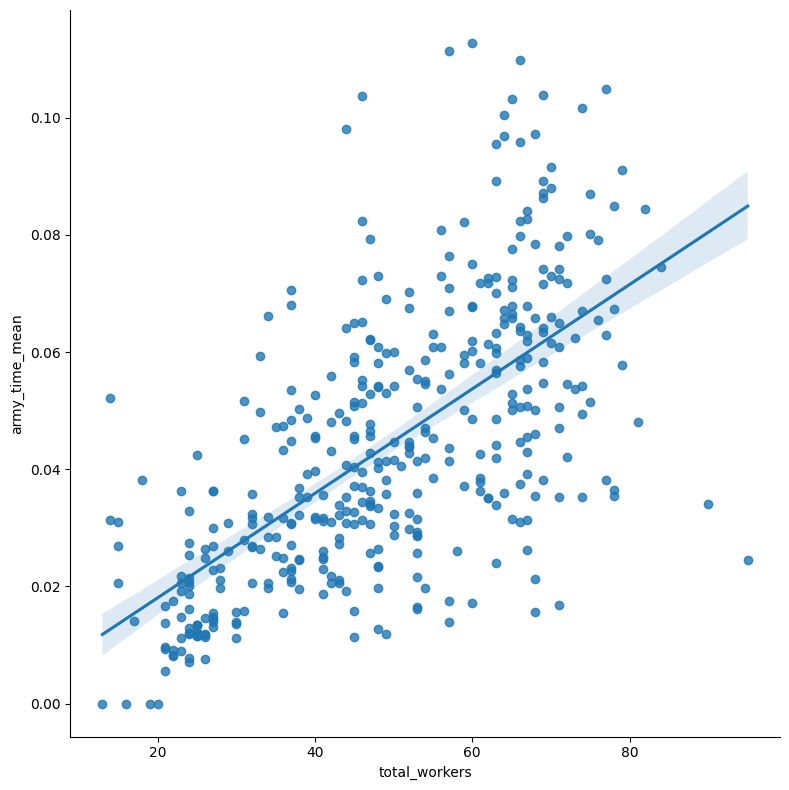

In [61]:
# Ermitteln welche Fraktion die stärkste Korrelation hat

import pandas as pd
import warnings

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np



df3 = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

df = pd.concat([df3, df4])

df["army_time_mean"]= df["total_army"]/df["time"]

heighti = 8

g3= sns.lmplot(x="total_workers", y="army_time_mean", data=df[["total_workers", "total_army", "fraction", "army_time_mean"]],
          height=heighti)

dfProtoss = df[df["fraction"] == "P"]
dfZerg = df[df["fraction"] == "Z"]
dfTerran = df[df["fraction"] == "T"]

corrProtoss = dfProtoss["total_workers"].corr(dfProtoss["army_time_mean"])
corrZerg = dfZerg["total_workers"].corr(dfZerg["army_time_mean"])
corrTerran = dfTerran["total_workers"].corr(dfTerran["army_time_mean"])

print("corrProtoss: {}\ncorrZerg: {}\ncorrTerran: {}".format(corrProtoss,corrZerg,corrTerran))


<Axes: >

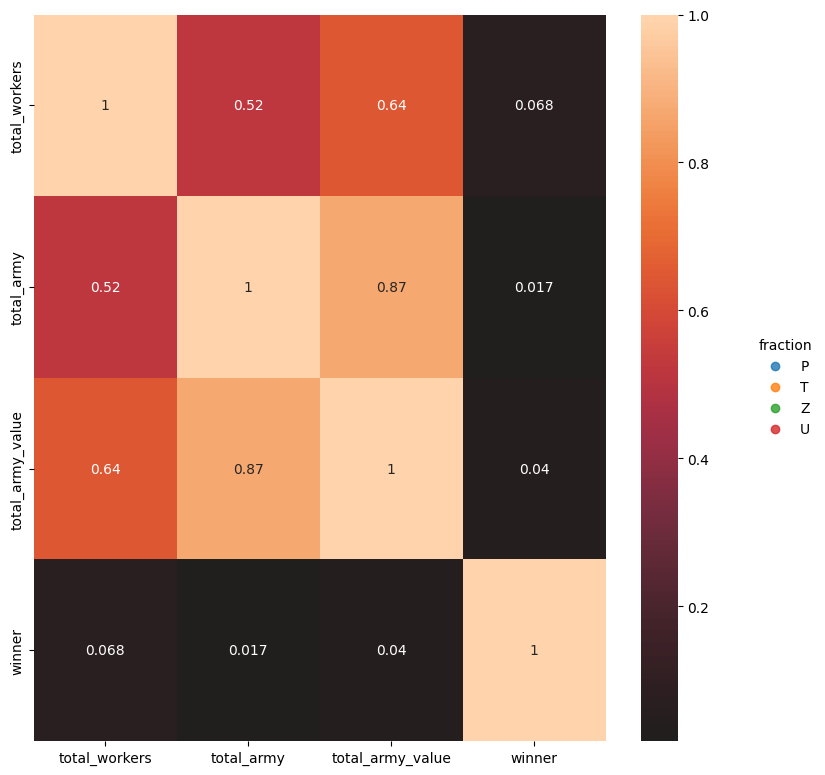

In [ ]:
# Ermitteln welche Fraktion die stärkste Korrelation hat

import pandas as pd
import warnings

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np


df = pd.read_csv('csv_dateien/starcraftFinalcsvs/1stRun.csv')

heighti = 8

g3= sns.lmplot(x="total_workers", y="total_army", hue="fraction", data=df[["total_workers", "total_army", "fraction", "total_army_value"]],
          height=heighti)


dfProtoss = df[df["fraction"] == "P"]
dfZerg = df[df["fraction"] == "Z"]
dfTerran = df[df["fraction"] == "T"]

sns.heatmap(df[["total_workers","total_army","total_army_value", "winner"]].corr(), annot=True, center=0)

In [ ]:
df = pd.read_csv('csv_dateien/starcraftFinalcsvs/testRun.csv')

df

,Unnamed: 0,player,total_workers,total_army_value,total_army,supply,fraction,winner,timestamp,replay_filename
0,0,HeRoMaRinE,69,3725,17,152,T,1,846,replays/testRun\787e297b85844284a1cb642c93e032...
1,1,Kelazhur,66,3675,19,152,T,0,849,replays/testRun\787e297b85844284a1cb642c93e032...
2,2,GuMiho,70,7125,38,171,T,0,1058,replays/testRun\792b4831e04e4529ac9767f6b3ce81...
3,3,liquidthermy,32,450,5,19,T,1,314,replays/testRun\797dc594bfb74e4eb740549ce75823...
4,4,SpeCial,49,3100,35,57,T,1,625,replays/testRun\816ab4f3a3f847d3ba88ba206ece00...
5,5,Drunkenboi,27,800,8,19,T,0,346,replays/testRun\825dc905a5dd4cfdb95e0ac5533f07...
6,6,Clem,77,11550,67,114,T,1,1339,replays/testRun\835aa02aa8f341b6a1c6785824bc04...
7,7,iaguz,72,8350,88,57,T,0,873,replays/testRun\837a6dc58a1341e78bd46cfb740d97...
8,8,SpeCial,50,2225,29,57,T,0,574,replays/testRun\838e55b5a13f460d8a6459ae3c87ec...
9,9,Kelazhur,66,8300,91,228,T,0,936,replays/testRun\845c5d642e114c4095ce88fc44b8cf...


In [ ]:
# regression without scaling

import pandas as pd
import warnings

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer

"""
df3 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

"""
df1 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/2ndRun.csv')
df = pd.concat([df1, df2])

dfTerran = df[df["fraction"] == "T"]

X = dfTerran[["total_workers"]]
y = dfTerran["total_army_value"]

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1
)

feat_transform = make_column_transformer(
    (StandardScaler(), ["total_workers"]),
)

scaler = StandardScaler()
lin_reg = make_pipeline(scaler, LinearRegression())
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print(f"The R^2 value in the test set is {r2_score(y_test, y_pred)}")


The R^2 value in the test set is 0.5397953597337526


In [ ]:
# optimizer with scaling and lin reg

import pandas as pd
import warnings
import gurobipy as gp
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
import gurobipy_pandas as gppd
from gurobi_ml import add_predictor_constr


"""
df1 = pd.read_csv('csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('csv_dateien/starcraftFinalcsvs/2ndRun.csv')
"""
df3 = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

df = pd.concat([df3, df4])


dfTerran = df[df["fraction"] == "T"]

X = dfTerran[["total_workers", "total_army"]]
y = dfTerran["total_army_value"]

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1
)

feat_transform = make_column_transformer(
    (StandardScaler(), ["total_workers", "total_army"]),
)

scaler = StandardScaler()
lin_reg = make_pipeline(scaler, LinearRegression())
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print(f"The R^2 value in the test set is {r2_score(y_test, y_pred)}")

data = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
dfTerranOpt = data[data["fraction"] == "T"]


# ,player,total_workers,total_army_value,total_army,fraction,winner,replay_filename
dfTerranOpt = dfTerranOpt.drop(columns=["total_workers","player", "replay_filename", "winner", "fraction", "Unnamed: 0"])

# create Model
m = gp.Model("Worker optimizer")

gppd.set_interactive()

# create variables
av = gppd.add_vars(m,lb=-gp.GRB.INFINITY, pandas_obj=dfTerranOpt, name="total_army_value")
w = gppd.add_vars(m,pandas_obj=dfTerranOpt, name="total_workers", vtype=gp.GRB.INTEGER)

m.update()


dfTerranOpt = dfTerranOpt.drop(columns=["total_army_value"])
feats = dfTerranOpt
feats = pd.concat([w, feats], axis=1)
print(feats.head)

m.setObjective((av/feats["time"]).sum(), gp.GRB.MAXIMIZE)
# m.setObjectiveN(w.sum(),1, gp.GRB.MINIMIZE)

gppd.add_constrs(m, w + feats["total_army"], gp.GRB.GREATER_EQUAL , 0)
gppd.add_constrs(m, w + feats["total_army"], gp.GRB.LESS_EQUAL , 200)

m.update()
feats = feats.drop(columns=["time"])
print(feats)
pred_constr = add_predictor_constr(m, lin_reg, feats, av)
# pred_constr = add_predictor_constr(m, lin_reg, feats, av)
pred_constr.print_stats()

# m.Params.NonConvex = 2

m.optimize()

print(w.gppd.X)

print(
    "Maximum error in approximating the regression {:.6}".format(
        np.max(pred_constr.get_error())
    )
)

outputs = pd.concat([pred_constr.input_values, av], axis=1)
print(outputs)



"""s#




dfTerranOpt = dfTerranOpt.loc[:, features]

m.update()

dfTerranOpt[:10]





"""


The R^2 value in the test set is 0.9077530301807172
<bound method NDFrame.head of                        total_workers  total_army  time
0      <gurobi.Var total_workers[0]>          29   535
1      <gurobi.Var total_workers[1]>          23   648
2      <gurobi.Var total_workers[2]>          60   948
3      <gurobi.Var total_workers[3]>          86  1063
4      <gurobi.Var total_workers[4]>           5   260
..                               ...         ...   ...
188  <gurobi.Var total_workers[188]>          67   935
189  <gurobi.Var total_workers[189]>          43   729
190  <gurobi.Var total_workers[190]>          47   765
191  <gurobi.Var total_workers[191]>           2   257
192  <gurobi.Var total_workers[192]>          20   467

[193 rows x 3 columns]>
                       total_workers  total_army
0      <gurobi.Var total_workers[0]>          29
1      <gurobi.Var total_workers[1]>          23
2      <gurobi.Var total_workers[2]>          60
3      <gurobi.Var total_workers[3]> 

's#\n\n\n\n\ndfTerranOpt = dfTerranOpt.loc[:, features]\n\nm.update()\n\ndfTerranOpt[:10]\n\n\n\n\n\n'

In [ ]:
# optimizer with scaling and lin reg aber mit werten zwischen 0 und 1

import pandas as pd
import warnings
import gurobipy as gp
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
import gurobipy_pandas as gppd
from gurobi_ml import add_predictor_constr


"""
df1 = pd.read_csv('csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('csv_dateien/starcraftFinalcsvs/2ndRun.csv')
"""
df3 = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

df = pd.concat([df3, df4])


dfTerran = df[df["fraction"] == "T"]

X = dfTerran[["total_workers", "total_army"]]
y = dfTerran["total_army_value"]

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1
)

feat_transform = make_column_transformer(
    (StandardScaler(), ["total_workers", "total_army"]),
)

scaler = StandardScaler()
lin_reg = make_pipeline(scaler, LinearRegression())
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print(f"The R^2 value in the test set is {r2_score(y_test, y_pred)}")

data = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
dfTerranOpt = data[data["fraction"] == "T"]


# ,player,total_workers,total_army_value,total_army,fraction,winner,replay_filename
dfTerranOpt = dfTerranOpt.drop(columns=["total_workers","player", "replay_filename", "winner", "fraction", "Unnamed: 0"])

# create Model
m = gp.Model("Worker optimizer")

gppd.set_interactive()

# create variables
av = gppd.add_vars(m,lb=-gp.GRB.INFINITY, pandas_obj=dfTerranOpt, name="total_army_value")
w = gppd.add_vars(m,pandas_obj=dfTerranOpt, name="total_workers", vtype=gp.GRB.INTEGER)

m.update()


dfTerranOpt = dfTerranOpt.drop(columns=["total_army_value"])
feats = dfTerranOpt
feats = pd.concat([w, feats], axis=1)
print(feats.head)

m.setObjective((av/feats["time"]).sum(), gp.GRB.MAXIMIZE)
# m.setObjectiveN(w.sum(),1, gp.GRB.MINIMIZE)

gppd.add_constrs(m, w + feats["total_army"], gp.GRB.GREATER_EQUAL , 0)
gppd.add_constrs(m, w + feats["total_army"], gp.GRB.LESS_EQUAL , 200)

m.update()
feats = feats.drop(columns=["time"])
print(feats)
pred_constr = add_predictor_constr(m, lin_reg, feats, av)
# pred_constr = add_predictor_constr(m, lin_reg, feats, av)
pred_constr.print_stats()

# m.Params.NonConvex = 2

m.optimize()

print(w.gppd.X)

print(
    "Maximum error in approximating the regression {:.6}".format(
        np.max(pred_constr.get_error())
    )
)

outputs = pd.concat([pred_constr.input_values, av], axis=1)
print(outputs)



"""s#




dfTerranOpt = dfTerranOpt.loc[:, features]

m.update()

dfTerranOpt[:10]





"""


In [ ]:
# optimizer with scaling and mlp

import pandas as pd
import warnings
import gurobipy as gp
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
import gurobipy_pandas as gppd
from gurobi_ml import add_predictor_constr


"""
df1 = pd.read_csv('csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('csv_dateien/starcraftFinalcsvs/2ndRun.csv')
"""
df3 = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

df = pd.concat([df3, df4])


dfTerran = df[df["fraction"] == "T"]

X = dfTerran[["total_workers", "total_army", "time"]]
y = dfTerran["total_army_value"]

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1
)

feat_transform = make_column_transformer(
    (StandardScaler(), ["total_workers", "total_army"]),
)

scaler = StandardScaler()
lin_reg = make_pipeline(scaler, MLPRegressor([20]*2, max_iter=10000, random_state=1))
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print(f"The R^2 value in the test set is {r2_score(y_test, y_pred)}")

data = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
dfTerranOpt = data[data["fraction"] == "T"]


# ,player,total_workers,total_army_value,total_army,fraction,winner,replay_filename
dfTerranOpt = dfTerranOpt.drop(columns=["total_workers","player", "replay_filename", "winner", "fraction", "Unnamed: 0"])

# create Model
m = gp.Model("Worker optimizer")

gppd.set_interactive()

# create variables
av = gppd.add_vars(m,lb=-gp.GRB.INFINITY, pandas_obj=dfTerranOpt, name="total_army_value")
w = gppd.add_vars(m,pandas_obj=dfTerranOpt, name="total_workers", vtype=gp.GRB.INTEGER)

m.update()


dfTerranOpt = dfTerranOpt.drop(columns=["total_army_value"])
feats = dfTerranOpt
feats = pd.concat([w, feats], axis=1)


m.setObjective((av/feats["time"]).sum(), gp.GRB.MAXIMIZE)
# m.setObjectiveN(w.sum(),1, gp.GRB.MINIMIZE)

gppd.add_constrs(m, w + feats["total_army"], gp.GRB.GREATER_EQUAL , 0)
gppd.add_constrs(m, w + feats["total_army"], gp.GRB.LESS_EQUAL , 200)

m.update()

pred_constr = add_predictor_constr(m, lin_reg, feats, av)
# pred_constr = add_predictor_constr(m, lin_reg, feats, av)
pred_constr.print_stats()

# m.Params.NonConvex = 2

m.optimize()



print(
    "Maximum error in approximating the regression {:.6}".format(
        np.max(pred_constr.get_error())
    )
)

outputs = pd.concat([pred_constr.input_values, av], axis=1)
print(outputs)




The R^2 value in the test set is 0.9252883889585416
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Model for pipe1:
16405 variables
8492 constraints
7720 general constraints
Input has shape (193, 3)
Output has shape (193, 1)

Pipeline has 2 steps:

--------------------------------------------------------------------------------
Step            Output Shape    Variables              Constraints              
                                                Linear    Quadratic      General
std_scaler1         (193, 3)          965          579            0            0

dense1             (193, 20)         7720         3860            0         3860 (relu)

dense2             (193, 20)         7720         3860            0         3860 (relu)

dense3              (193, 1)            0          193            0            0


--------------------------------------------------------------------------------
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win

's#\n\n\n\n\ndfTerranOpt = dfTerranOpt.loc[:, features]\n\nm.update()\n\ndfTerranOpt[:10]\n\n\n\n\n\n'

In [ ]:
# optimizer with scaling and mlp

import pandas as pd
import warnings
import gurobipy as gp
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
import gurobipy_pandas as gppd
from gurobi_ml import add_predictor_constr


"""
df1 = pd.read_csv('csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('csv_dateien/starcraftFinalcsvs/2ndRun.csv')
"""
df3 = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

df = pd.concat([df3, df4])


dfTerran = df[df["fraction"] == "T"]

X = dfTerran[["total_workers", "total_army", "time"]]
y = dfTerran["total_army_value"]

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1
)

feat_transform = make_column_transformer(
    (StandardScaler(), ["total_workers", "total_army"]),
)

scaler = StandardScaler()
lin_reg = make_pipeline(scaler, PLSRegression())
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print(f"The R^2 value in the test set is {r2_score(y_test, y_pred)}")

data = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
dfTerranOpt = data[data["fraction"] == "T"]


# ,player,total_workers,total_army_value,total_army,fraction,winner,replay_filename
dfTerranOpt = dfTerranOpt.drop(columns=["total_workers","player", "replay_filename", "winner", "fraction", "Unnamed: 0"])

# create Model
m = gp.Model("Worker optimizer")

gppd.set_interactive()

# create variables
av = gppd.add_vars(m,lb=-gp.GRB.INFINITY, pandas_obj=dfTerranOpt, name="total_army_value")
w = gppd.add_vars(m,pandas_obj=dfTerranOpt, name="total_workers", vtype=gp.GRB.INTEGER)

m.update()


dfTerranOpt = dfTerranOpt.drop(columns=["total_army_value"])
feats = dfTerranOpt
feats = pd.concat([w, feats], axis=1)


m.setObjective((av/feats["time"]).sum(), gp.GRB.MAXIMIZE)
# m.setObjectiveN(w.sum(),1, gp.GRB.MINIMIZE)

gppd.add_constrs(m, w + feats["total_army"], gp.GRB.GREATER_EQUAL , 0)
gppd.add_constrs(m, w + feats["total_army"], gp.GRB.LESS_EQUAL , 200)

m.update()

pred_constr = add_predictor_constr(m, lin_reg, feats, av)
# pred_constr = add_predictor_constr(m, lin_reg, feats, av)
pred_constr.print_stats()

# m.Params.NonConvex = 2

m.optimize()



print(
    "Maximum error in approximating the regression {:.6}".format(
        np.max(pred_constr.get_error())
    )
)

outputs = pd.concat([pred_constr.input_values, av], axis=1)
print(outputs)




The R^2 value in the test set is 0.9206150635272222
Model for pipe1:
965 variables
772 constraints
Input has shape (193, 3)
Output has shape (193, 1)

Pipeline has 2 steps:

--------------------------------------------------------------------------------
Step            Output Shape    Variables              Constraints              
                                                Linear    Quadratic      General
std_scaler1         (193, 3)          965          579            0            0

PLSRegressionConstr1       (193, 1)            0          193            0            0

--------------------------------------------------------------------------------
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 1158 rows, 1351 columns and 2316 nonzeros
Model fingerprint: 0x4b40fad0
Va

In [95]:
# optimizer with scaling and mlp and num worker ratio

import pandas as pd
import warnings
import gurobipy as gp
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
import gurobipy_pandas as gppd
from gurobi_ml import add_predictor_constr


"""
df1 = pd.read_csv('csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('csv_dateien/starcraftFinalcsvs/2ndRun.csv')
"""
df3 = pd.read_csv('csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')



df = pd.concat([df3, df4])

df["armyvalueovertime"] = df["total_army_value"]/(df["time"]/60)
df["workersovertime"] = df["total_workers"]/(df["time"]/60)

df["worker_army_ratio"] = df["total_army"]/df["total_workers"]


dfTerran = df[df["fraction"] == "T"]

dfTerran = dfTerran[dfTerran["time"]> 0]

X = dfTerran[["total_workers", "total_army","worker_army_ratio", "time"]]
y = dfTerran["armyvalueovertime"]

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1
)

feat_transform = make_column_transformer(
    (StandardScaler(), ["total_workers", "total_army","worker_army_ratio", "time"]),
)

scaler = StandardScaler()
lin_reg = make_pipeline(scaler, PLSRegression())
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print(f"The R^2 value in the test set is {r2_score(y_test, y_pred)}")

dfTerranOpt = dfTerran


# ,player,total_workers,total_army_value,total_army,fraction,winner,replay_filename
dfTerranOpt = dfTerranOpt.drop(columns=["worker_army_ratio","player", "replay_filename", "winner", "fraction", "Unnamed: 0", "armyvalueovertime"])

# create Model
m = gp.Model("Worker optimizer")

gppd.set_interactive()

# create variables
av = gppd.add_vars(m,lb=-gp.GRB.INFINITY, pandas_obj=dfTerranOpt, name="armyvalueovertime")
w = gppd.add_vars(m,pandas_obj=dfTerranOpt, name="worker_army_ratio", vtype=gp.GRB.INTEGER)

m.update()


dfTerranOpt = dfTerranOpt.drop(columns=["worker_army_ratio", "armyvalueovertime"])
feats = dfTerranOpt
feats = pd.concat([w, feats], axis=1)


m.setObjective((av).sum(), gp.GRB.MAXIMIZE)
# m.setObjectiveN(w.sum(),1, gp.GRB.MINIMIZE)

gppd.add_constrs(m, w + feats["total_army"], gp.GRB.GREATER_EQUAL , 0)
gppd.add_constrs(m, w + feats["total_army"], gp.GRB.LESS_EQUAL , 200)

m.update()

pred_constr = add_predictor_constr(m, lin_reg, feats, av)
# pred_constr = add_predictor_constr(m, lin_reg, feats, av)
pred_constr.print_stats()

# m.Params.NonConvex = 2

m.optimize()



print(
    "Maximum error in approximating the regression {:.6}".format(
        np.max(pred_constr.get_error())
    )
)

outputs = pd.concat([pred_constr.input_values, av], axis=1)
print(outputs)




The R^2 value in the test set is 0.7835341021186899


ValueError: Index contains duplicate entries, cannot create variables